In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [42]:
df = pd.read_csv("../sample_25percent.csv")
df

,Unnamed: 0,artist,song,text,number_of_tokens
0,20468,Van Halen,Take Your Whiskey Home,well my baby she don't want me around. she ...,1197
1,41605,Lil Wayne,Army Gunz,yeah yeah yeah (i got army gunz) yeah yeah ...,2860
2,52292,Stevie Wonder,Isn't She Lovely,isn't she lovely isn't she wonderful isn't s...,580
3,42697,Mariah Carey,O Holy Night,o holy night the stars are brightly shining i...,408
4,27993,Clash,I'm So Bored With The U.S.A.,yankee soldier he want to shoot some skag he...,610
...,...,...,...,...,...
12703,25325,Billie Holiday,My Last Affair,can't you see what love and romance have done...,461
12704,28783,Dave Matthews Band,The Space Between,you cannot quit me so quickly is no hope in y...,1620
12705,18645,Squeeze,Crying In My Sleep,breaking up is breaking my heart is showing ...,894
12706,32684,Foo Fighters,Dear Lover,dear lover do you remember? the sound of you...,691


In [310]:
x = TfidfVectorizer(500000).fit_transform(df.text)
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(x)

In [311]:
y = df.loc[:,['artist']].values

In [312]:
pca = PCA(n_components=3)

In [313]:
principalComponents = pca.fit_transform(X)

In [314]:

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [315]:
principalDf.head(5)

,principal component 1,principal component 2,principal component 3
0,0.017150,0.083717,0.068036
1,-0.013923,-0.007209,0.030411
2,-0.146507,0.132773,0.199658
3,-0.186075,-0.050072,-0.063969
4,-0.140699,-0.050516,-0.019155


In [316]:
df[['artist']].head()

,artist
0,Van Halen
1,Lil Wayne
2,Stevie Wonder
3,Mariah Carey
4,Clash


In [317]:
finalDf = pd.concat([principalDf, df[['artist']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,artist
0,0.017150,0.083717,0.068036,Van Halen
1,-0.013923,-0.007209,0.030411,Lil Wayne
2,-0.146507,0.132773,0.199658,Stevie Wonder
3,-0.186075,-0.050072,-0.063969,Mariah Carey
4,-0.140699,-0.050516,-0.019155,Clash


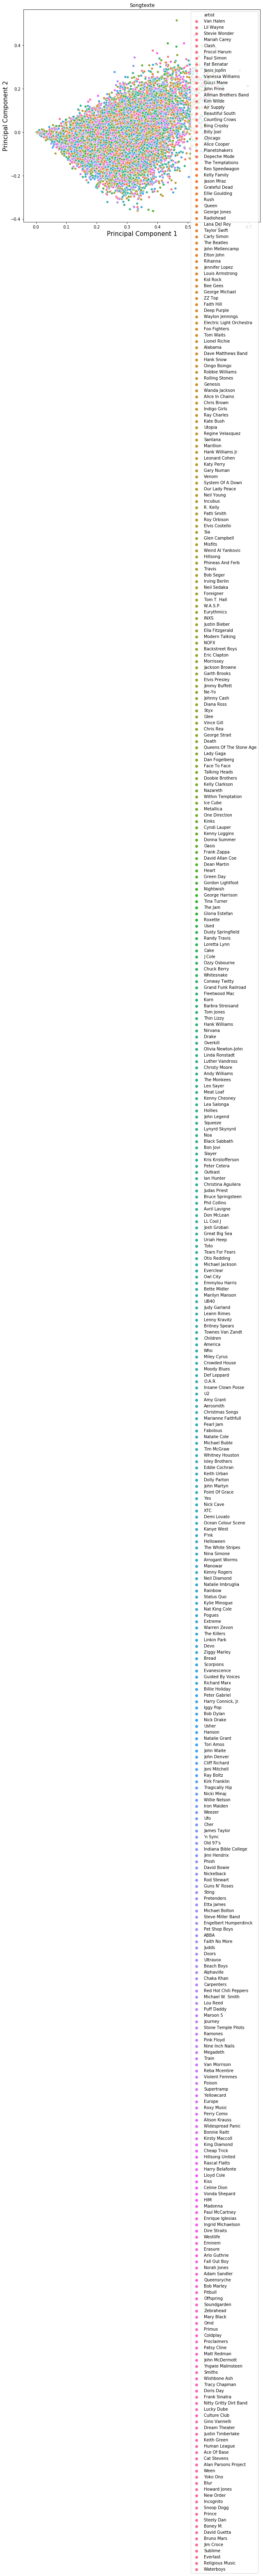

In [318]:
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=True)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X[:, 0], X[:, 1],hue=finalDf.artist, marker="o")
plt.title("Songtexte")

plt.show()


In [73]:
pca.explained_variance_ratio_

array([0.10703174, 0.05403775])

In [382]:
from collections import Counter
c = Counter(df.artist).most_common()[10:]

In [383]:
sample = df.copy()

In [384]:
for el in c:
    sample = sample[sample.artist != el[0]]
sample

,Unnamed: 0,artist,song,text,number_of_tokens
28,34483,Grateful Dead,Eyes Of The World,right outside this lazy summer home you ain't...,958
66,8438,Indigo Girls,Everything In It's Own Time,remember everything i told you keep it in you...,1098
74,7501,Hank Williams Jr.,The Cheatin' Hotel,when you check in the cheatin' hotel you'll b...,1905
88,51071,Roy Orbison,Hey Good Lookin',hey good lookin' what you got cookin'? how's...,972
128,34084,Glee,I Won't Give Up,when i look into your eyes it's like watching...,1470
...,...,...,...,...,...
12565,35292,Hank Williams Jr.,I've Been Around,i've been around. i used to sing songs that w...,841
12581,13057,Michael W. Smith,A Way,[verse 1] caught in a dream of where i want ...,968
12636,43840,Michael W. Smith,Above All,above all powers above all kings above all n...,1232
12652,33884,George Strait,I Met A Friend Of Yours Today,yes i know i'm late gettin' home tonight can...,796


In [385]:
from sklearn.feature_extraction.text import CountVectorizer

x = TfidfVectorizer(max_features=1000, stop_words = None).fit_transform(sample.text)
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(x)

In [386]:
y = sample.loc[:,['artist']].values

In [387]:
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X)
#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2'])

In [388]:
finalDf = pd.concat([principalDf, sample['artist']], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,artist
0,0.017150,0.083717,0.068036,NaN
1,-0.013923,-0.007209,0.030411,NaN
2,-0.146507,0.132773,0.199658,NaN
3,-0.186075,-0.050072,-0.063969,NaN
4,-0.140699,-0.050516,-0.019155,NaN


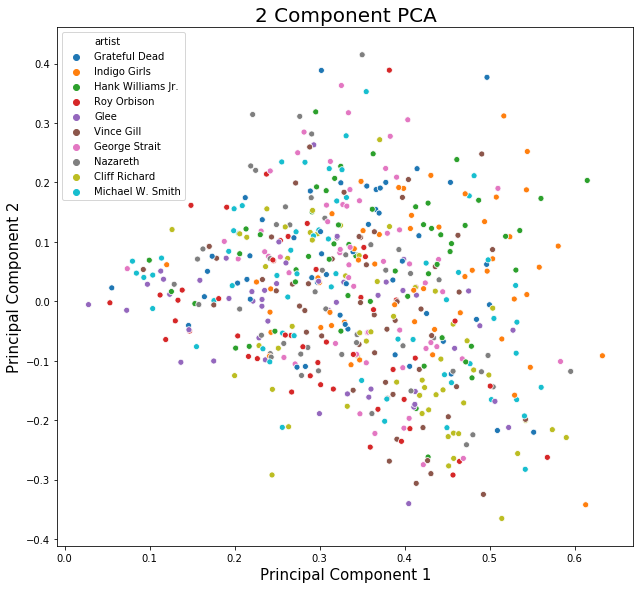

In [389]:
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=True)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
sns.scatterplot(X[:, 0], X[:, 1],hue=sample['artist'], marker="o")


plt.show()


In [246]:
pca.explained_variance_ratio_

array([0.06544081, 0.04018436, 0.03698376, 0.03094211, 0.03057775,
       0.02858746, 0.0272524 , 0.02492275, 0.02474916, 0.02329716,
       0.02320165, 0.02280494, 0.02245626, 0.02092023, 0.02071719,
       0.0206473 , 0.01996011, 0.01983719, 0.01937368, 0.01880024,
       0.01853651, 0.01821682, 0.01797506, 0.01753406, 0.01737373,
       0.01717468, 0.01704289, 0.01667932, 0.01655111, 0.01629185,
       0.0160287 , 0.01595378, 0.01580139, 0.01541599, 0.01531561,
       0.01516692, 0.01504686, 0.01501315, 0.01471265, 0.01455212,
       0.01444469, 0.01426119, 0.01409727, 0.01390631, 0.01385855,
       0.01371901, 0.01352585, 0.01333661, 0.01313712, 0.00767368])